# Task 2: Prediction using Decision Tree  Algorithm

Author: Kiran Chhamain

dataset: https://bit.ly/3kXTdox

In [1]:
import pandas as pd                                         #importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv("Documents/Python/Iris.csv")                     

In [3]:
print (dataset.shape)              ## To know number of rows and collumnsshape of dataset

(150, 6)


In [4]:
dataset.head()                     #First 5 rows of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.tail(150)                            #First and Last 5 rows of a dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
dataset.info()                            #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
dataset.describe().T                                          #Summary statistics

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [9]:
dataset.isnull()                      #any null value present in the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [10]:
dataset.isnull().sum()           #sum of null values in dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
dataset = dataset.drop(['Id'], axis=1)            #dropping the 'ID'column

In [12]:
dataset.shape               #shape of dataset after dropping a column

(150, 5)

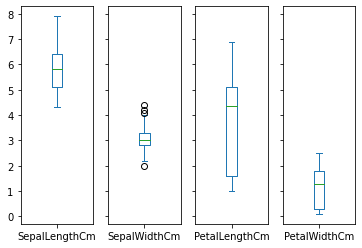

In [13]:
dataset.plot(kind = 'box', subplots='True', sharex= 'False', sharey='False')
plt.show()

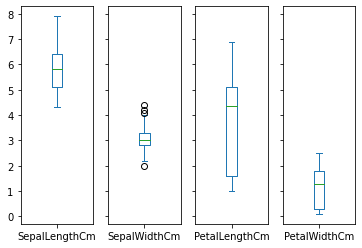

In [14]:
dataset.plot(kind = 'box', subplots='True', sharex= 'True', sharey='True')
plt.show()

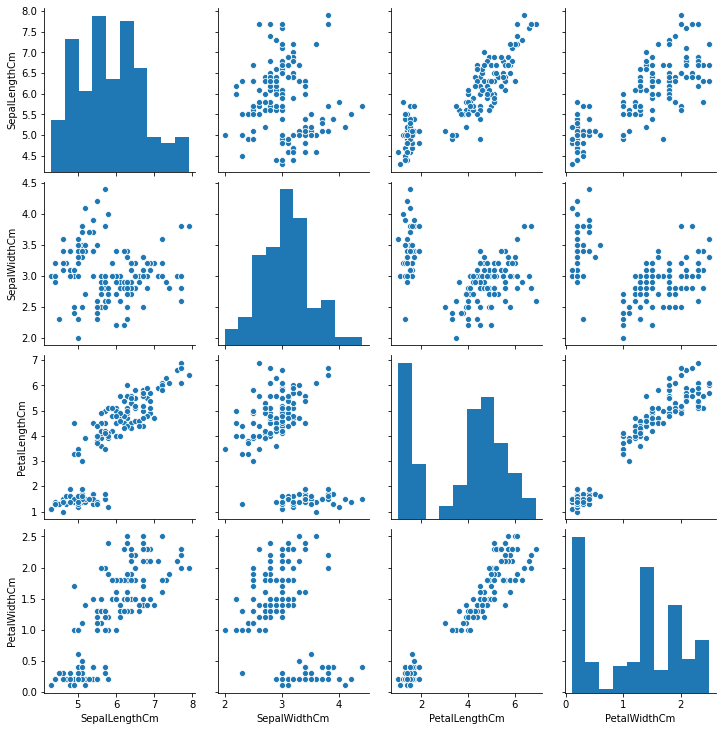

In [15]:
sns.pairplot(dataset)

In [16]:
corelation= dataset.corr()                        #Corelation between the dataset points

<AxesSubplot:>

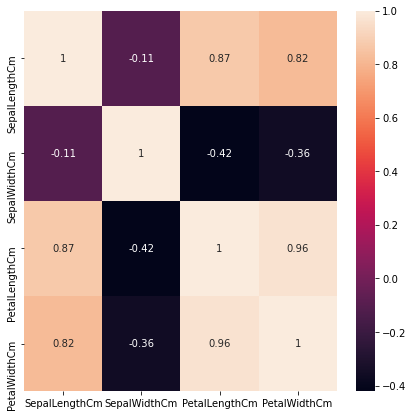

In [17]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

In [18]:
# To remove outliers from 'sepalWidthCm'
q1 = dataset['SepalWidthCm'].quantile(0.25)
q3 = dataset['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
df = dataset[(dataset['SepalWidthCm'] >= q1-1.5*iqr) & (dataset['SepalWidthCm'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 5)

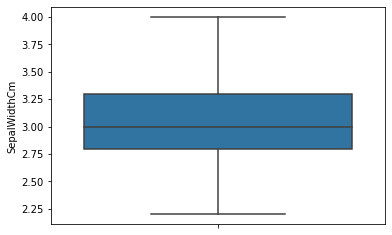

In [19]:
sns.boxplot(y=df['SepalWidthCm'])              ## Boxplot for SepalWidthCm after outlier treatment
plt.show()

We can see that after outlier treatment the number of roes are reduced to 146 from 150

In [20]:
dataset['Species'].unique()                     #unique values in dataset

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:xlabel='Species', ylabel='count'>

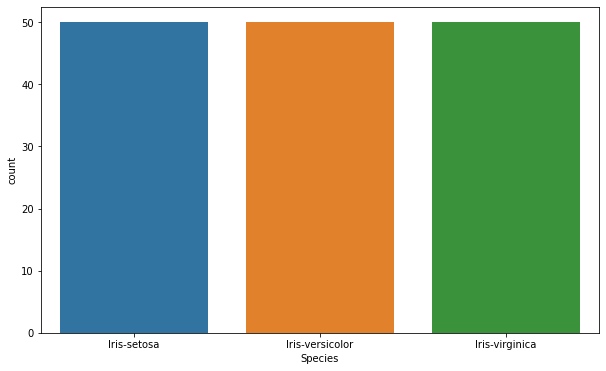

In [21]:
plt.figure(figsize=(10,6))                           #plotting the target values
sns.countplot(x='Species',data=dataset)

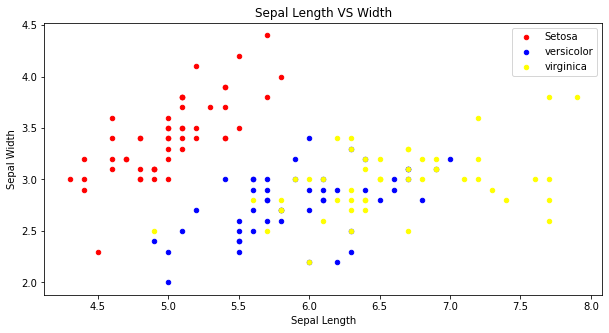

In [22]:
plot = dataset[dataset.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
dataset[dataset.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=plot)
dataset[dataset.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='yellow', label='virginica', ax=plot)
plot.set_xlabel("Sepal Length")
plot.set_ylabel("Sepal Width")
plot.set_title("Sepal Length VS Width")
plot=plt.gcf()
plot.set_size_inches(10,5)
plt.show()

The above graph shows relationship between the sepal length and width.

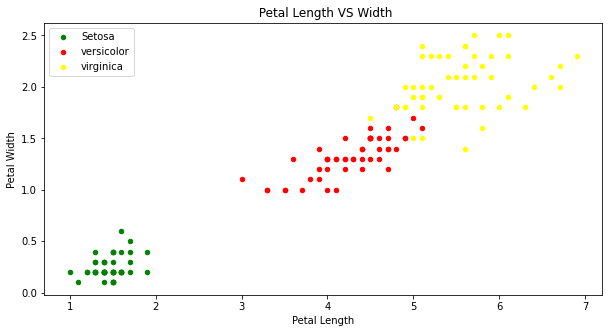

In [23]:
plot2 = dataset[dataset.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='Setosa')
dataset[dataset.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='red', label='versicolor',ax=plot2)
dataset[dataset.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='yellow', label='virginica', ax=plot2)
plot2.set_xlabel("Petal Length")
plot2.set_ylabel("Petal Width")
plot2.set_title(" Petal Length VS Width")
plot2=plt.gcf()
plot2.set_size_inches(10,5)
plt.show()

The above graph shows relationship between the Petal length and width.

# Prediction using Kmeans

In [24]:
x = dataset.iloc[:, [0, 1, 2, 3]].values

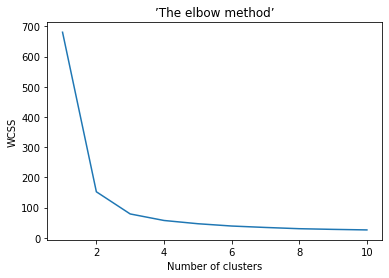

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #inertia_ is the formula used to segregate the data points into clusters

#Visualizing the ELBOW method to get the optimal value of K 

plt.plot(range(1, 11), wcss)                   
plt.title("’The elbow method’")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #within cluster sum of squares
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state =
0)
y_kmeans = kmeans.fit_predict(x)

In [27]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


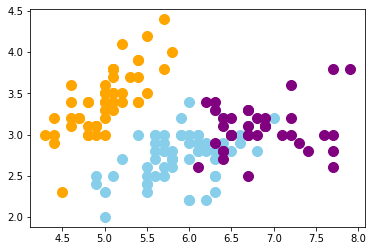

In [28]:
#Visualizing all the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, color = "skyblue", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, color = "orange", label =
"Iris-versicolour")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, color = "purple", label =
"Iris-virginica")

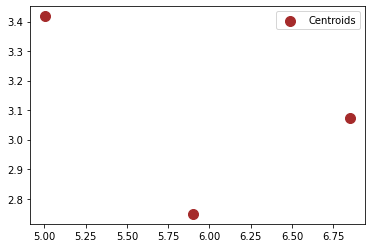

In [29]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, color = "brown",
label = "Centroids")
plt.legend()

In [30]:
print(f'cluster 1: {x[y_kmeans == 0, 0].shape[0]} ')   #higher cluster among 3

cluster 1: 62 


In [31]:
print(f'cluster 2: {x[y_kmeans == 1, 0].shape[0] } ')

cluster 2: 50 


In [32]:
print(f'cluster 3: {x[y_kmeans == 2, 0].shape[0] } ')         #smalles cluster among 3

cluster 3: 38 


In [33]:
centroides = kmeans.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [34]:
centroides = kmeans.labels_
centroides

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

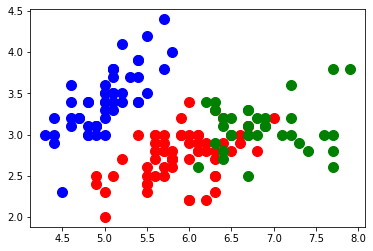

In [35]:
plt.scatter(x[centroides == 0, 0], x[centroides == 0, 1], s = 100, color = "red", label = "Iris-setosa")
plt.scatter(x[centroides == 1, 0], x[centroides == 1, 1], s = 100, color = "blue", label =
"Iris-versicolour")
plt.scatter(x[centroides == 2, 0], x[centroides == 2, 1], s = 100, color = "green", label =
"Iris-virginica")